# importing Libraries

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler , OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score , recall_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Loading and visualizing Data 

In [3]:
Cancer_set=pd.read_csv(r"C:\Users\Administrator\Desktop\my_lab\Breast Cancer\Breast_Cancer.csv")

In [4]:
Cancer_set.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [5]:
Cancer_set.info()
# no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [6]:
Cancer_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4024.0,53.972167,8.963134,30.0,47.0,54.0,61.0,69.0
Tumor Size,4024.0,30.473658,21.119696,1.0,16.0,25.0,38.0,140.0
Regional Node Examined,4024.0,14.357107,8.099675,1.0,9.0,14.0,19.0,61.0
Reginol Node Positive,4024.0,4.158052,5.109331,1.0,1.0,2.0,5.0,46.0
Survival Months,4024.0,71.297962,22.921430,1.0,56.0,73.0,90.0,107.0


In [7]:
object_data=Cancer_set.select_dtypes(include='object').columns
int_data=Cancer_set.select_dtypes(include='int64').columns

In [8]:
object_data.drop('Status' )

Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status'],
      dtype='object')

## Data Visualization

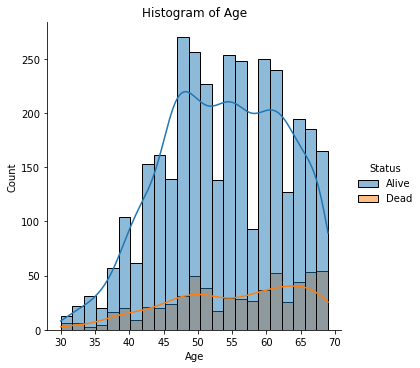

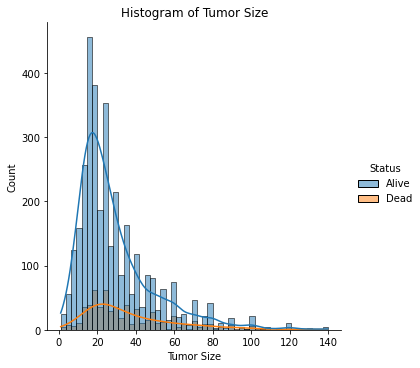

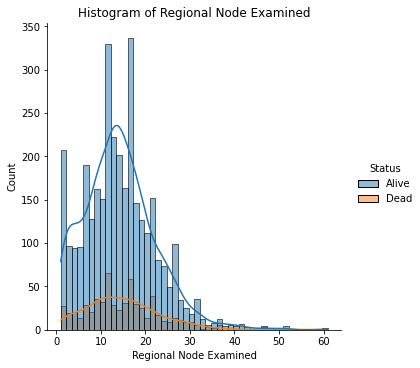

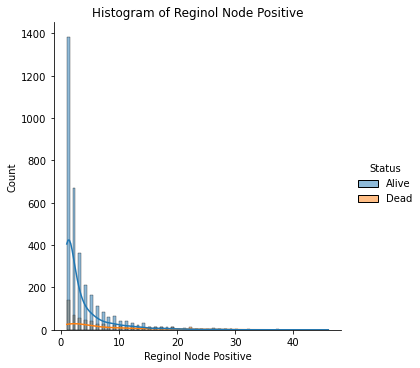

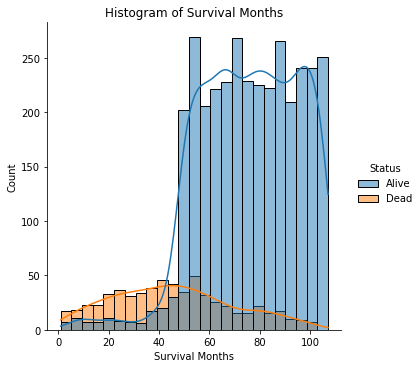

In [9]:
for col in int_data:
    sns.displot( data=Cancer_set , x=col , kde=True , hue='Status')
    plt.title(f"Histogram of {col}")

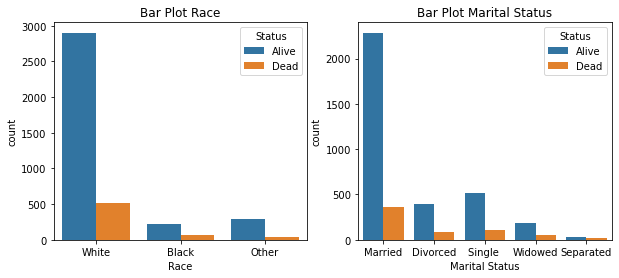

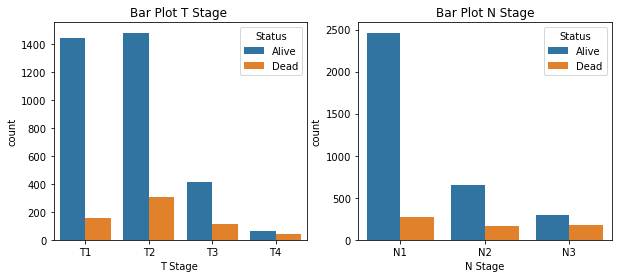

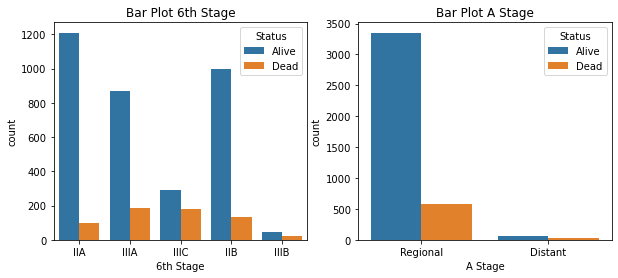

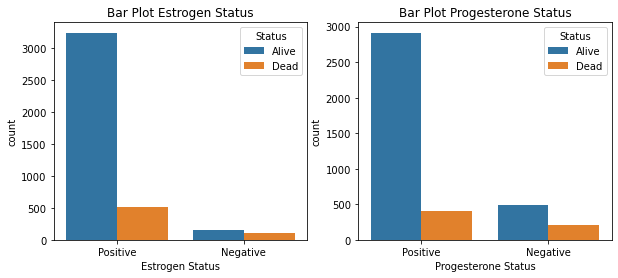

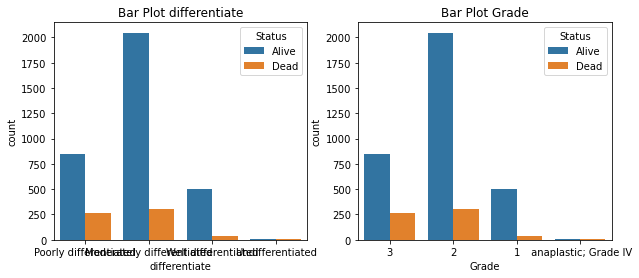

In [11]:
def plot_object(dataset , var1 , var2):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    sns.countplot(x=var1 , data=dataset, hue='Status',ax=axes[0])
    axes[0].set_title(f'Bar Plot {var1}')
    sns.countplot(x=var2,  data=dataset, hue='Status', ax=axes[1])
    axes[1].set_title(f'Bar Plot {var2}')
plot_object(Cancer_set , 'Race' , 'Marital Status')
plot_object(Cancer_set , 'T Stage ', 'N Stage')
plot_object(Cancer_set , '6th Stage' , 'A Stage')
plot_object(Cancer_set , 'Estrogen Status', 'Progesterone Status')
plot_object(Cancer_set , 'differentiate', 'Grade')


In [12]:
Cancer_set.Status.value_counts()
Cancer_set["Status"]=Cancer_set["Status"].map({'Alive':1 , 'Dead':0})

<AxesSubplot:>

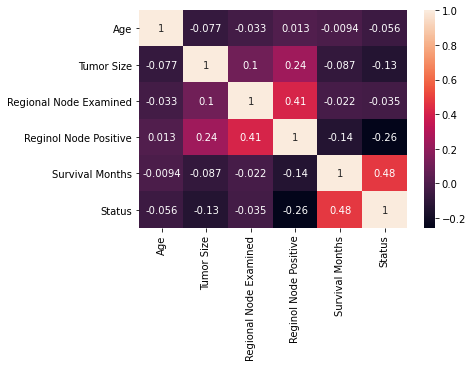

In [13]:
sns.heatmap(Cancer_set.corr() , annot=True)

## hypothesis

## splitting_Train_Test

In [14]:
y=Cancer_set["Status"]
X=Cancer_set.drop('Status' , axis=1)
X_train , X_test , y_train , y_test=train_test_split(X , y , test_size=0.2 , random_state=42, stratify = y)


In [15]:
rf=RandomForestClassifier(n_estimators=600 , max_depth=17)
xgboost=xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

## ColumnTransformer 

In [17]:
list_int=list(int_data)
list_1hot=list(X_train[['Race', 'Marital Status', 'differentiate', 'Estrogen Status', 'Progesterone Status']])
list_ordinal=list(X_train[[ 'T Stage ', 'N Stage', '6th Stage', 'Grade', 'A Stage']])


coltransformer= ColumnTransformer([ ('std'  ,MinMaxScaler() , list_int) , 
                                    ('1hot' ,OneHotEncoder() , list_1hot) , 
                                     ('ordinal', OrdinalEncoder(), list_ordinal),  ])



In [18]:
X_train_pre=coltransformer.fit_transform(X_train)

In [19]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_pre, y_train)

In [20]:
## xgboost
y_pred=cross_val_predict(xgboost ,X_train_resampled ,  y_train_resampled , cv=5)
print(f"precision score is : {precision_score(y_train_resampled , y_pred)}")
print(f"recall score  is : {recall_score(y_train_resampled , y_pred)}")

precision score is : 0.897119341563786
recall score  is : 0.9596478356566398


In [21]:
## RandomForest
y_pred_1=cross_val_predict(rf ,X_train_resampled ,  y_train_resampled , cv=5)
print(f"precision score is : {precision_score(y_train_resampled , y_pred)}")
print(f"recall score  is : {recall_score(y_train_resampled , y_pred)}")

precision score is : 0.897119341563786
recall score  is : 0.9596478356566398


# Fine_Tuning_hyperparameters

In [333]:
#random forest
param_grid = { 
    'n_estimators': [200, 500 ,600 ],
    'max_depth' : [ 10 , 15, 17],
}

In [1]:
rf_grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5 , scoring='accuracy')
rf_grid_search.fit(X_train_resampled , y_train_resampled)

NameError: name 'GridSearchCV' is not defined

In [335]:
rf_grid_search.best_params_

{'max_depth': 17, 'n_estimators': 600}